# Saving a basic fastai model

In [1]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
#!pip install gradio

In [2]:
fastbook.setup_book()

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
def is_cat(x): return x[0].isupper() 

In [5]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.192260,0.057319,0.022327,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.078021,0.030756,0.013532,00:05
1,0.045712,0.015648,0.007442,00:06
2,0.022779,0.022321,0.007442,00:05


In [7]:
learn.export('model.pkl')

In [8]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [9]:
img=search_images_ddg("grizzly bear")
len(img)

200

In [10]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']


In [11]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

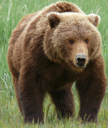

In [12]:
im = Image.open(dest)
im.to_thumb(128,128)

In [13]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [21]:
import os

In [25]:
# if not path.exists():
#     os.mkdir(path)
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear')
    download_images(dest, urls=results)

In [26]:
fns = get_image_files(path)
fns

(#585) [Path('bears/teddy/168ea270-1120-4c23-8dfc-f8277add27a7.JPG'),Path('bears/teddy/b514f0d2-3552-4b1b-b7d8-57a7e225918f.jpg'),Path('bears/teddy/6b01ae6f-92d1-47d3-bba4-f849ab680074.jpg'),Path('bears/teddy/86a11b75-d6ab-480a-8c7c-4c2f0d4503a0.jpg'),Path('bears/teddy/a7e1ad88-2aae-4dc0-9353-fafc09ef9fd3.jpg'),Path('bears/teddy/3543caab-2bda-43a4-9fca-e912e71cbb14.jpg'),Path('bears/teddy/6c57f7ec-d7e8-4a8b-a2ac-d01a602b69e2.jpg'),Path('bears/teddy/e63fa9b3-a3a4-42a0-9e89-a6fd25ae20d8.jpeg'),Path('bears/teddy/d59d063b-1f45-4ab0-867e-c5c485878d3f.jpg'),Path('bears/teddy/6caac61d-f3a7-4d30-b822-70e72a1fc332.jpg')...]

In [27]:
failed = verify_images(fns)
failed

(#4) [Path('bears/teddy/47c5b6c0-6f4e-45b4-b331-31a7cfcaed43.jpg'),Path('bears/grizzly/7e1ffbb9-abba-4f92-893c-3906ae2efd2d.jpg'),Path('bears/grizzly/efc6e711-a47d-440a-94ac-44bc8eba55a6.jpg'),Path('bears/grizzly/0c642fff-c5b9-4b0a-adaf-7f03e0b9e810.jpg')]

In [28]:
failed.map(Path.unlink);

In [29]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [31]:
dls = bears.dataloaders(path)

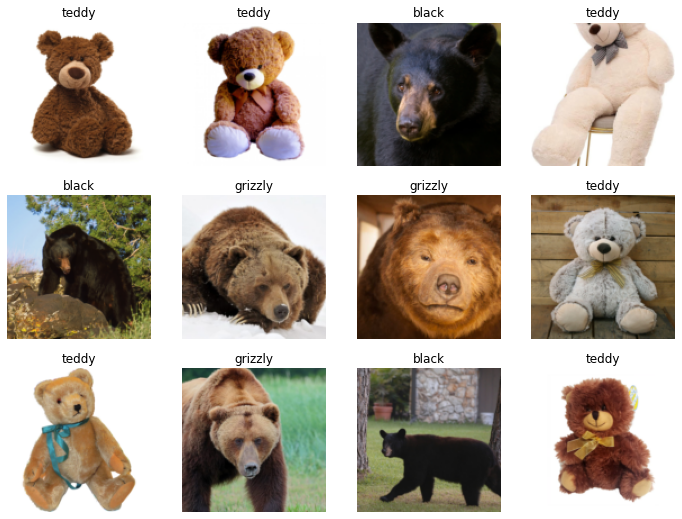

In [32]:
dls.valid.show_batch(max_n=12, nrows=3)

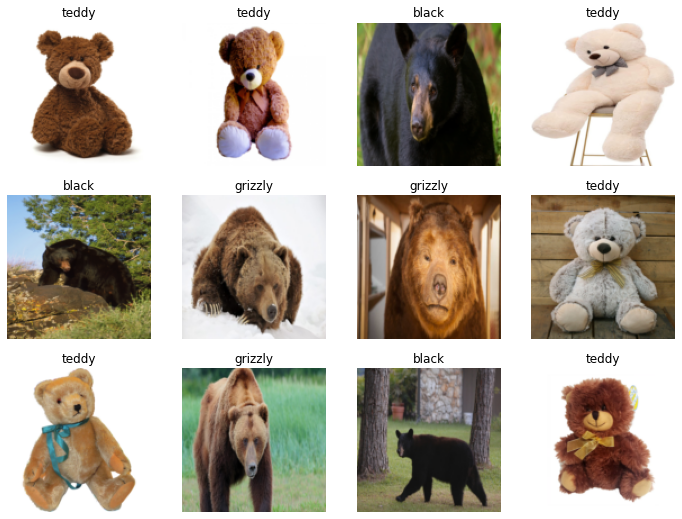

In [33]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=12, nrows=3)

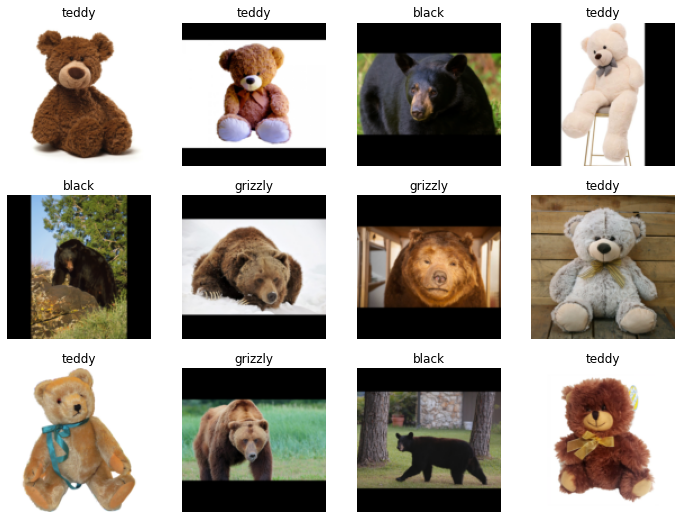

In [34]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=12, nrows=3)

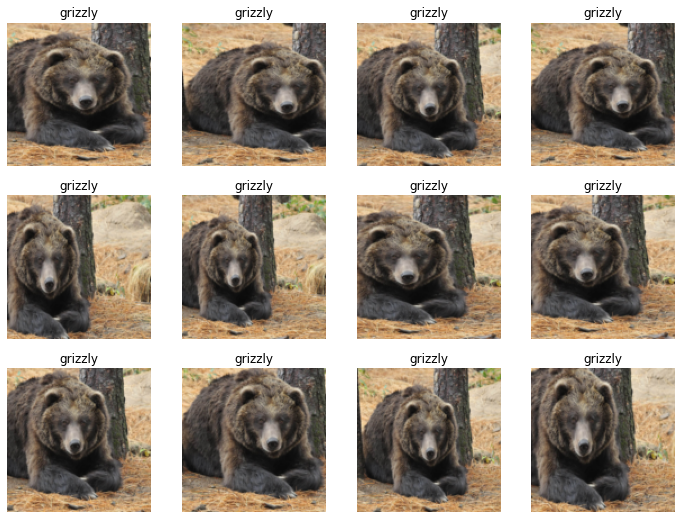

In [35]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=12, nrows=3, unique=True)

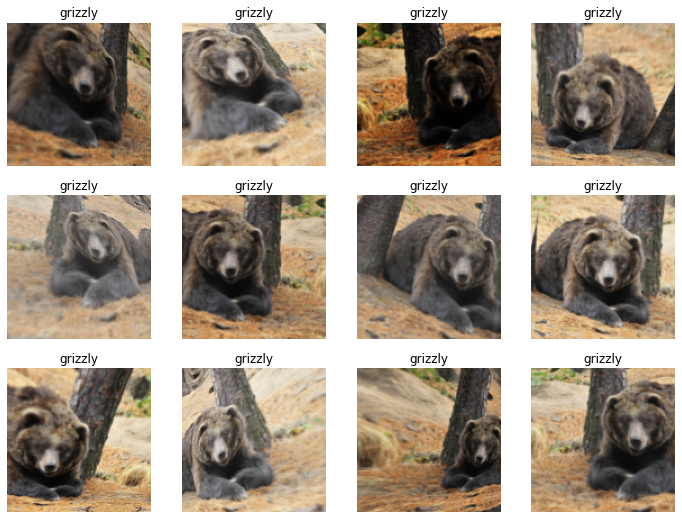

In [36]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=12, nrows=3, unique=True)

# Training Your Model, and Using It to Clean Your Data

In [37]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [38]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.327389,0.168545,0.086207,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.148374,0.106325,0.025862,00:05
1,0.099054,0.120465,0.034483,00:06
2,0.085231,0.152030,0.034483,00:06
3,0.070974,0.147120,0.034483,00:06


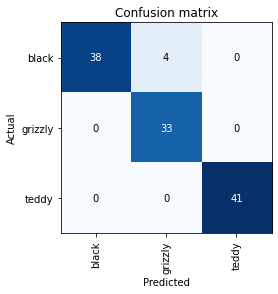

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

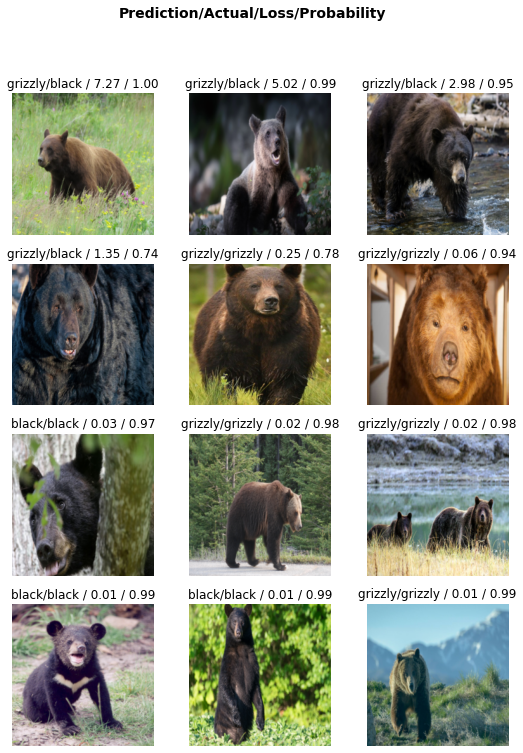

In [41]:
interp.plot_top_losses(12, nrows=4)

In [42]:
#GUI
cleaner = ImageClassifierCleaner(learn)
cleaner

In [43]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('model.pkl'),Path('export.pkl')]

In [44]:
learn_inf = load_learner(path/'export.pkl')

In [45]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([1.3301e-05, 9.9999e-01, 4.5395e-07]))

In [46]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

# Now create a notebook app from this model

In [47]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [48]:
btn_upload


FileUpload(value={'Yogi_Autumn_0T2A9469.jpg': {'metadata': {'name': 'Yogi_Autumn_0T2A9469.jpg', 'type': 'image…

In [49]:
img = PILImage.create(btn_upload.data[-1])

In [50]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [51]:
pred,pred_idx,probs = learn_inf.predict(img)

In [52]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9996')

In [53]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [54]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [55]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [56]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

# Github and github desktop

In [58]:
!git clone https://huggingface.co/spaces/jph00/minima

Cloning into 'minima'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 607 bytes | 607.00 KiB/s, done.


In [62]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!!"

iface = gr.Interface(fn=greet, inputs="text", outputs="text")
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://157592ec08023563.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


# Dogs Vs. Cats

In [63]:
def is_cat(x): return x[0].isupper()

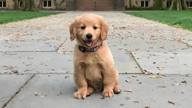

In [72]:
im=PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [73]:
learn= load_learner('model.pkl')

In [74]:
%time learn.predict(im)

CPU times: user 156 ms, sys: 0 ns, total: 156 ms
Wall time: 34.9 ms


('False', TensorBase(0), TensorBase([1.0000e+00, 3.4119e-06]))

In [75]:
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [76]:
classify_image(im)

{'Dog': 0.999996542930603, 'Cat': 3.411926172702806e-06}

In [79]:
image = gr.inputs.Image(shape=(192, 192))
label= gr.outputs.Label()
examples = ['dog.jpg','cat.jpg','na.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://15f012fb0a376035.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
